In [21]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

import autograd.numpy as np
from matplotlib import pyplot as plt

from autograd import grad, elementwise_grad
from tensorflow.examples.tutorials.mnist import input_data 
from tqdm import trange

plt.rcParams["figure.figsize"] = (15,10)

mnist = input_data.read_data_sets("data/", one_hot=True)

x = 9

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


(55000, 784)
55000
12560
(28, 28)


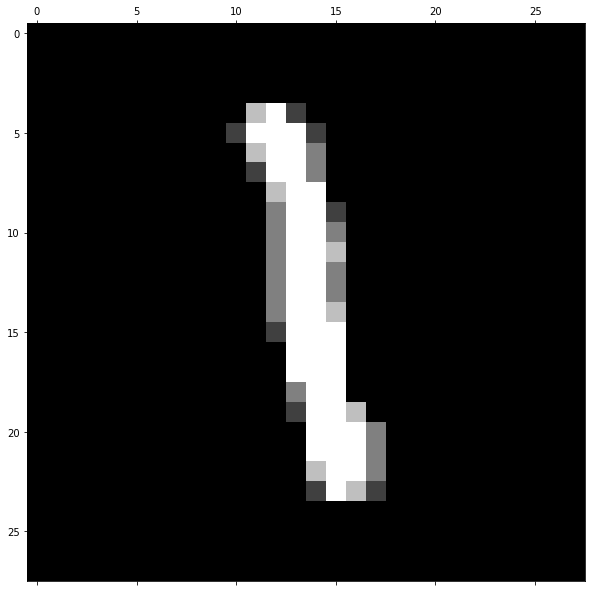

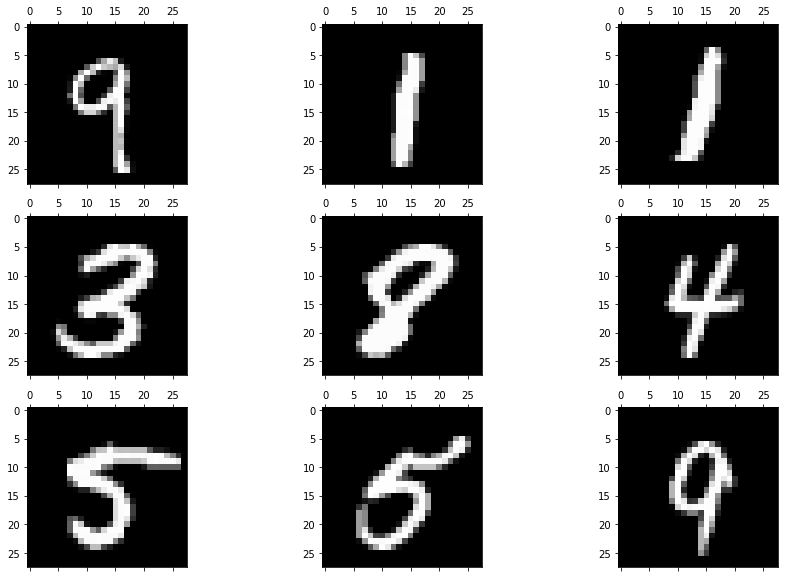

In [35]:
print(mnist.train.images.shape)
num_images = mnist.train.images.shape[0]
print(num_images)
random_image = np.random.choice(num_images)
print(random_image)
image = mnist.train.images[random_image]

image = image.reshape((28, 28))
print(image.shape)

plt.matshow(image, cmap='gray')
plt.show()

w, h = 3, 3
fig, axs = plt.subplots(h, w)
for i in range(h):
    for j in range(w):
        random_image = np.random.choice(num_images)
        image = mnist.train.images[random_image]
        image = image.reshape((28, 28))
        axs[i, j].matshow(image, cmap='gray')
        
plt.show()

In [61]:
learning_rate = 0.1

W1 = np.random.normal(loc=0.0, scale=0.1, size=(784, 100))
W2 = np.random.normal(loc=0.0, scale=0.1, size=(100, 10))

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))


def feed(W1, W2, image): 
    first_layer = sigmoid(np.dot(image, W1))
    second_layer = sigmoid(np.dot(first_layer, W2))
    return second_layer


def cost(W1, W2, images, labels):
    probs = feed(W1, W2, images)
    total_cost = 0.0
    for i in range(images.shape[0]):
        total_cost += np.sum((probs[i]-labels[i])**2)
    return total_cost / images.shape[0]


def train(W1, W2, images, labels):
    dW1_cost = grad(cost, 0)
    dW2_cost = grad(cost, 1)
    dW1 = dW1_cost(W1, W2, images, labels)
    dW2 = dW2_cost(W1, W2, images, labels)
    W1 -= dW1 * learning_rate
    W2 -= dW2 * learning_rate

    
def plot(image):
    probs = feed(W1, W2, image)
    plt.bar(range(10), probs)
    plt.matshow(image.reshape((28, 28)))
    plt.show()

100%|██████████| 50/50 [00:54<00:00,  1.10s/it]


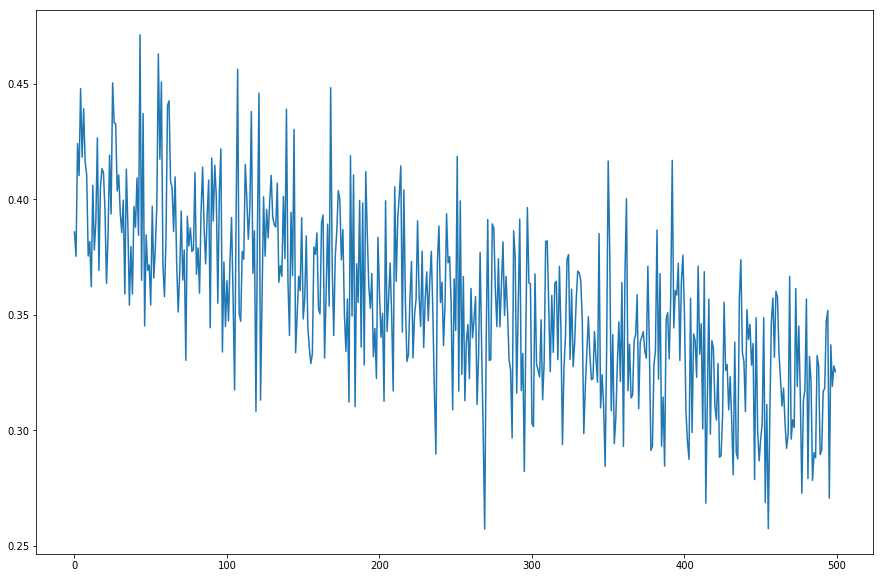

In [68]:
epochs = 50
costs = []

for i in trange(epochs):
    for _ in range(10):
        images, labels = mnist.train.next_batch(100)
        train(W1, W2, images, labels)
        costs.append(cost(W1, W2, images, labels))
        
plt.plot(costs)
plt.show()